# k-means clustering implemented in python

### initial setup and testing

In [197]:
## load basic libraries

import numpy as np ## data processing 
from scipy.spatial.distance import cdist ## distance calculations

In [198]:
## get data to cluster; something off the shelf
# libraries
from sklearn.datasets import load_digits
#operations
data = load_digits().data
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [199]:
## prompt called for binomial clusters../
## here, we'll use multinomial data and apply PCA
# libraries
from sklearn.decomposition import PCA
# operation
pca = PCA(n_components = 2)
data2 = pca.fit_transform(data)
data2

array([[ -1.25946709,  21.27489027],
       [  7.95761333, -20.76869845],
       [  6.99192281,  -9.95599461],
       ...,
       [ 10.8012812 ,  -6.96024742],
       [ -4.87209507,  12.42393988],
       [ -0.34439315,   6.36555168]])

In [200]:
## looks good

In [229]:
## initial setup for k-means
m = data2.shape[0] ## number of samples for training
n = data2.shape[1] ## number of features, here = 2 dt application of PCA
K = 5 ## number of clusters; initially chosen manually
n_iter = 100 ## number of iterations assumed for convergence

In [230]:
## k-means begins with a set of K randomly initiated centroids
## centroids represent the mean value point for each K cluster
## k-means interatively reassigns centroid class to minimize ...
## ... (for example) total euclidean distance, points <-> centroids

In [231]:
## First, we randomly initialize centroids
idx = np.random.choice(m, K, replace=False) ## randomized index
centroids = data2[idx, :] ## create centroid assignment from index


In [232]:
## Next, we find the distances between centroids and data points
## Here, we are choosign euclidean distance for simplicity
# libraries
from scipy.spatial.distance import cdist 
# operation
distances = cdist(data2, centroids ,'euclidean') ## cdist euclident


In [233]:
## Then, data points assigned to centroids (clusters) with min distance
cluster = np.array([np.argmin(i) for i in distances])


In [234]:
## Finally, exhaustively interate distance calculation & reassignment

for _ in range(n_iter):   ## iteration value unused
    centroids = [] ## initialize empty centroid list
    for idx in range(K):
        ## take means for each centroid
        temp_cent = data2[points==idx].mean(axis=0)
        ## update centroids with new values
        centroids.append(temp_cent)
        
    ## apply updated centroids
    centroids = np.vstack(centroids)
    
    ## calculate distances betweend ata points and nearest centroids
    distances = cdist(data2, centroids ,'euclidean')
    
    ## assign data points to nearest centroids
    cluster = np.array([np.argmin(i) for i in distances]) 

cluster 




array([2, 1, 1, ..., 1, 2, 3])

In [208]:
## looks good

### k-means function

In [217]:
## Now, we implement as function
# libraries
import numpy as np
from scipy.spatial.distance import cdist 


# definition
def kmeans(X,K,n_iter):
    idx = np.random.choice(m, K, replace=False) ## randomized index
    centroids = data2[idx, :] ## create centroid assignment from index
    distances = cdist(data2, centroids ,'euclidean') ## cdist euclident
    cluster = np.array([np.argmin(i) for i in distances]) ## assignments
    
    for _ in range(n_iter):   ## iteration value unused
        centroids = [] ## initialize empty centroid list
        for idx in range(k):
            ## take means for each centroid
            temp_cent = data2[points==idx].mean(axis=0)
            ## update centroids with new values
            centroids.append(temp_cent)
        
        ## apply updated centroids
        centroids = np.vstack(centroids)

        ## calculate distances betweend ata points and nearest centroids
        distances = cdist(data2, centroids ,'euclidean')

        ## assign data points to nearest centroids
        cluster = np.array([np.argmin(i) for i in distances]) 

    return cluster 

### k-means test with visualization

In [225]:
## test
label = kmeans(data2,2,1000)
label

array([2, 1, 1, ..., 1, 2, 3])

In [211]:
## looks good...

#### visualization

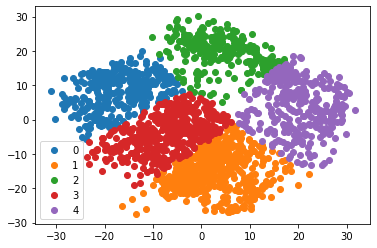

In [226]:
## visualization via standard scatter plot
# libraries
import matplotlib.pyplot as plt

#operation
labels = np.unique(label) ## generate unique cluster id 
for i in cluster_ids: ## iteratively assign labels
    plt.scatter(data2[label == i , 0] , data2[label == i , 1] , label = i) 
plt.legend()
plt.show()